In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
city = "Springfield"
content = "review"

df = pd.read_csv(f'../filtered_cities/{city}_{content}.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11686 entries, 0 to 11685
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    11686 non-null  object
 1   user_id      11686 non-null  object
 2   business_id  11686 non-null  object
 3   stars        11686 non-null  int64 
 4   useful       11686 non-null  int64 
 5   funny        11686 non-null  int64 
 6   cool         11686 non-null  int64 
 7   text         11686 non-null  object
 8   date         11686 non-null  object
dtypes: int64(4), object(5)
memory usage: 821.8+ KB


In [4]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,LLzom-2TITa4gasV7_fCCA,jrOeN_F9lz5415C8JLUKNg,XTQ3iEaLMUbJg2DrcodslA,5,0,0,0,Great experience purchasing a washer and dryer...,2017-08-07 19:51:10
1,a5JHzBrWxRd_OmIvV7znDA,04JlTjJRbcv_kS9xVPhOdg,WM3q-7scdPUei6fu4SJFYw,1,0,0,0,Went here based on the high ratings and raves ...,2014-11-12 12:41:29
2,X-o--dwf0HuFMittYi4wCA,DyMhw62zEnMp3-9_ModB5A,vFpbUcVAXxrSz5mFIzKbyw,1,3,0,0,"oh Millers, how i wanted to like you. You are...",2013-09-04 03:14:34
3,INGNbsyo-MouZZzcxnCSGQ,hvEsb-IORs-N3bTGc7d_NA,WM3q-7scdPUei6fu4SJFYw,2,0,1,0,This place gets two stars from me only because...,2016-05-31 03:38:54
4,k7VatXVLism-cTDJE8TTUw,xhvarYGyc24FrfBoeq3WsA,V7TaLZ5EB94hqRIZ1_xjGQ,5,0,0,0,"This place was awesome. Clean, beautiful and t...",2017-01-27 18:43:27


In [5]:
df.duplicated().sum()

0

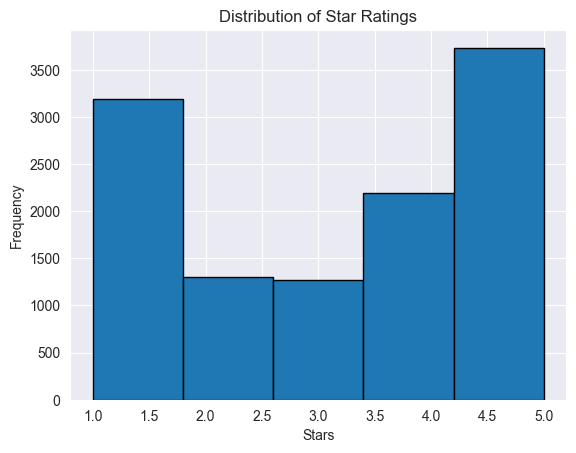

In [6]:
plt.hist(df['stars'], bins=5, edgecolor='black')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

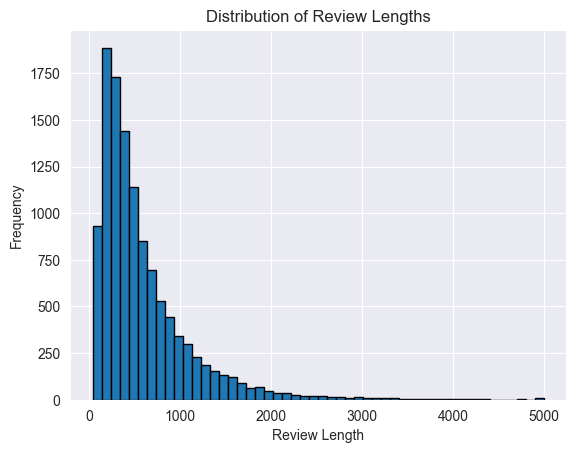

In [7]:
df['review_length'] = df['text'].apply(len)
plt.hist(df['review_length'], bins=50, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

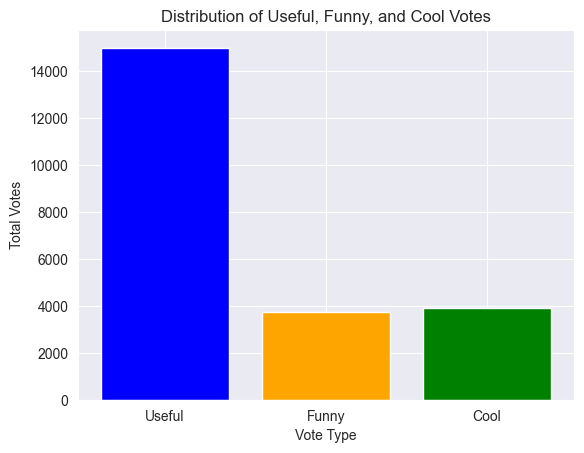

In [8]:
total_useful = df['useful'].sum()
total_funny = df['funny'].sum()
total_cool = df['cool'].sum()
totals = {'Useful': total_useful, 'Funny': total_funny, 'Cool': total_cool}

plt.bar(totals.keys(), totals.values(), color=['blue', 'orange', 'green'])
plt.title('Distribution of Useful, Funny, and Cool Votes')
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.show()

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
reviews_over_time = df.resample('ME').size()

plt.figure(figsize=(10, 6))
reviews_over_time.plot(color='skyblue')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

ValueError: Invalid frequency: ME